In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
hm_data = pd.read_csv("hm_data.csv")

In [26]:
pd.options.display.max_columns = 40

In [27]:
hm_data

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,colour_group_code,colour_group_name,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,t_dat,customer_id,price,sales_channel_id,quantity,price_sek,active,club_member_status,age
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,9,Black,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,0.008458,1,2,57.18,1.0,ACTIVE,37.0
1,108775015,108775,Strap top,253,Vest top,Garment Upper body,9,Black,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,2018-09-20,20ccafd82d923baecf1fb8705d459e243c8ca9c74ee24e...,0.008458,1,1,57.18,1.0,ACTIVE,43.0
2,108775015,108775,Strap top,253,Vest top,Garment Upper body,9,Black,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,2018-09-20,2135790e6b63d10b59f9d8b84a58e24328b0f5ed3a48f1...,0.008458,1,1,57.18,1.0,ACTIVE,23.0
3,108775015,108775,Strap top,253,Vest top,Garment Upper body,9,Black,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,2018-09-20,8f705a2c9edd473b9213ede4aeec2f8f0456af49c84da0...,0.008458,1,1,57.18,1.0,ACTIVE,26.0
4,108775015,108775,Strap top,253,Vest top,Garment Upper body,9,Black,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,2018-09-20,90b6a077e6e6495f675ad7cf1408b07df066ca226e6216...,0.008458,1,2,57.18,1.0,ACTIVE,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5148192,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,9,Black,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,2020-09-14,3e8272741c39b3579424da34b2c8b752d2cce5010774d5...,0.059305,2,1,400.93,1.0,ACTIVE,58.0
5148193,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,9,Black,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,2020-09-15,38155dba0255d0b6f8884b36dd05094d62c71ca9c10311...,0.059305,2,1,400.93,1.0,ACTIVE,24.0
5148194,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,9,Black,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,2020-09-16,98b6235b68deffd24b91233fc692549ba104724c8b1263...,0.059305,2,1,400.93,1.0,ACTIVE,60.0
5148195,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,9,Black,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,2020-09-18,8f624351c9fccf5b8c0ae427435b1e16ce4b2aaf3f629a...,0.059305,2,1,400.93,1.0,ACTIVE,53.0


# Palette Colors

In [30]:
# H&M brand color code - RED Hex code #CC071E

In [31]:
hm_colors = ["#CC071E", "#81CC07", "#5207CC", "#FFDB00", "#FC7703" ,"#07CCB5"]

In [32]:
sns.color_palette(hm_colors)

[(0.8, 0.027450980392156862, 0.11764705882352941),
 (0.5058823529411764, 0.8, 0.027450980392156862),
 (0.3215686274509804, 0.027450980392156862, 0.8),
 (1.0, 0.8588235294117647, 0.0),
 (0.9882352941176471, 0.4666666666666667, 0.011764705882352941),
 (0.027450980392156862, 0.8, 0.7098039215686275)]

In [33]:
sns.set_palette(sns.color_palette(hm_colors))

# Customer Behavior Analysis
### Age groups most likely to buy Ladieswear

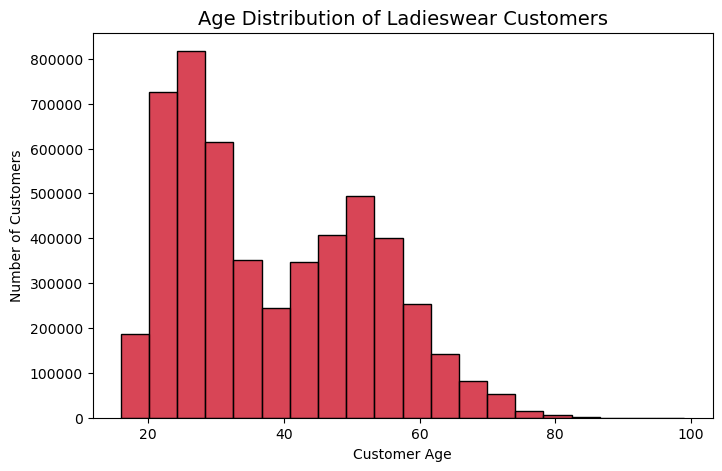

In [35]:

plt.figure(figsize=(8,5))

sns.histplot(hm_data["age"].dropna().astype(int), bins=20)

plt.title("Age Distribution of Ladieswear Customers", fontsize=14)
plt.xlabel("Customer Age")
plt.ylabel("Number of Customers")

plt.savefig("Age Distribution of Ladieswear Customers.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


### Repeat vs first-time customers

#### Count transactions per customer

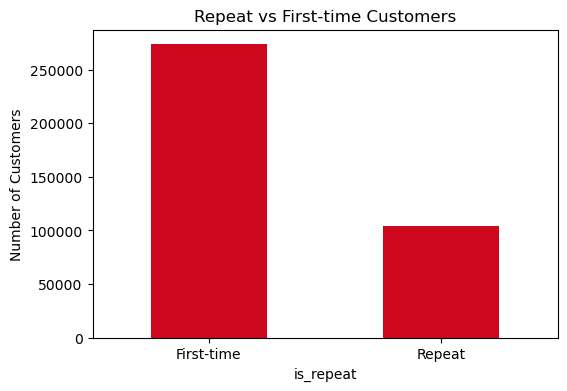

In [37]:

repeat_customers = hm_data.groupby("customer_id")["t_dat"].nunique().reset_index()
repeat_customers["is_repeat"] = repeat_customers["t_dat"] > 1

repeat_customers["is_repeat"].value_counts().plot(kind="bar", figsize=(6,4), title= "Repeat vs First-time Customers")
plt.xticks([0,1], ["First-time", "Repeat"], rotation=0)
plt.ylabel("Number of Customers")

plt.savefig("Repeat vs First-time Customers.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()



Counts:
 is_repeat
True     273611
False    104413
Name: count, dtype: int64

Percentages:
 is_repeat
True     72.379267
False    27.620733
Name: count, dtype: float64


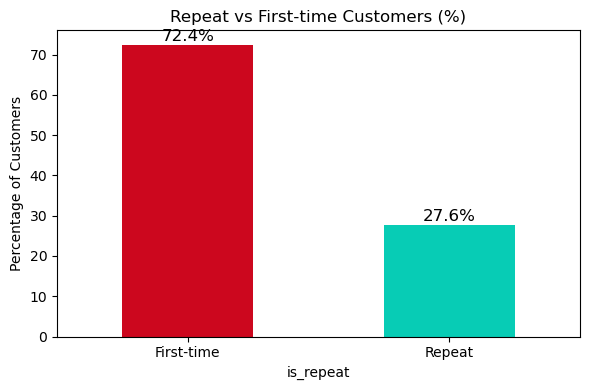

In [348]:

repeat_customers = hm_data.groupby("customer_id")["t_dat"].nunique().reset_index()
repeat_customers["is_repeat"] = repeat_customers["t_dat"] > 1


counts = repeat_customers["is_repeat"].value_counts()
percentages = counts / counts.sum() * 100

print("Counts:\n", counts)
print("\nPercentages:\n", percentages)

# Plot percentages instead of counts
plt.figure(figsize=(6,4))
percentages.plot(kind="bar", color=["#CC071E", "#07CCB5"], title="Repeat vs First-time Customers (%)")
plt.xticks([0,1], ["First-time", "Repeat"], rotation=0)
plt.ylabel("Percentage of Customers")

# Add percentage labels on bars
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center", fontsize=12)

plt.tight_layout()
plt.savefig("Repeat vs First-time Customers Percentage.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


### Customer purchase frequency

#### Average number of purchases per customer

In [39]:
purchases_per_customer = hm_data.groupby("customer_id").size().reset_index(name="purchases")

In [40]:
purchases_per_customer = purchases_per_customer.merge(hm_data[["customer_id", "age"]].drop_duplicates(), on="customer_id", how="left")

/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/2371932264.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase_dist = purchases_per_customer.groupby("age_group")["purchases"].sum().reset_index()


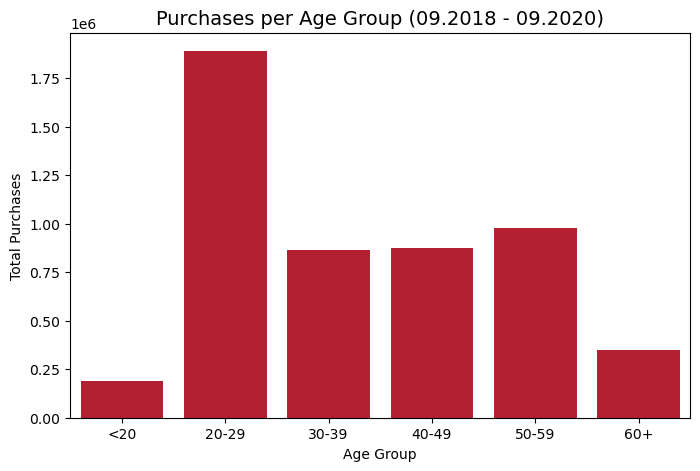

In [41]:

age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60+"]
purchases_per_customer["age_group"] = pd.cut(
    purchases_per_customer["age"], bins=age_bins, labels=age_labels
)

age_purchase_dist = purchases_per_customer.groupby("age_group")["purchases"].sum().reset_index()


plt.figure(figsize=(8,5))

sns.barplot(x="age_group", y="purchases", data=age_purchase_dist, color="#CC071E")

plt.title("Purchases per Age Group (09.2018 - 09.2020)", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Total Purchases")

plt.savefig("Purchases per Age Group.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


In [43]:
# Convert t_dat to datetime

hm_data["t_dat"] = pd.to_datetime(hm_data["t_dat"], errors="coerce")


In [45]:

# Separate Year and month and add new columns

hm_data["year"] = hm_data["t_dat"].dt.year
hm_data["month_num"] = hm_data["t_dat"].dt.month
hm_data["month_str"] = hm_data["t_dat"].dt.strftime('%b')
hm_data["year_month"] = hm_data["t_dat"].dt.to_period('M').astype(str)


#### Average Purchases per Customer per Year (Ladieswear)

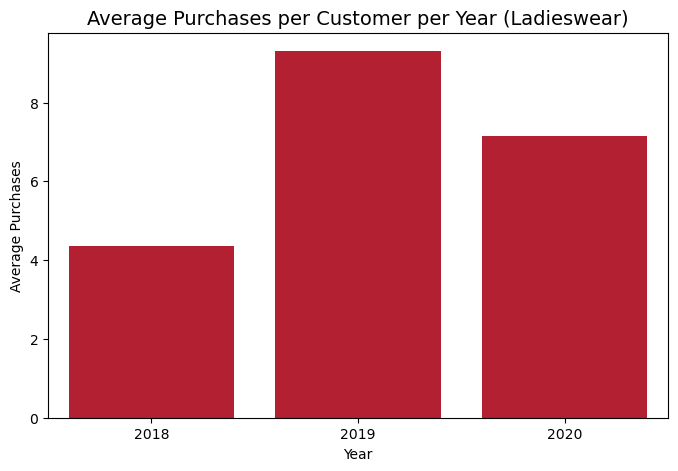

In [53]:


yearly_purchases = (
    hm_data.groupby(["year", "customer_id"])
    .size()
    .reset_index(name="purchases")
    .groupby("year")["purchases"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,5))

sns.barplot(x="year", y="purchases", data=yearly_purchases)
plt.title("Average Purchases per Customer per Year (Ladieswear)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Purchases")

plt.savefig("Average Purchases per Customer per Year.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


#### Average Purchases per Customer per Month  (Ladieswear)

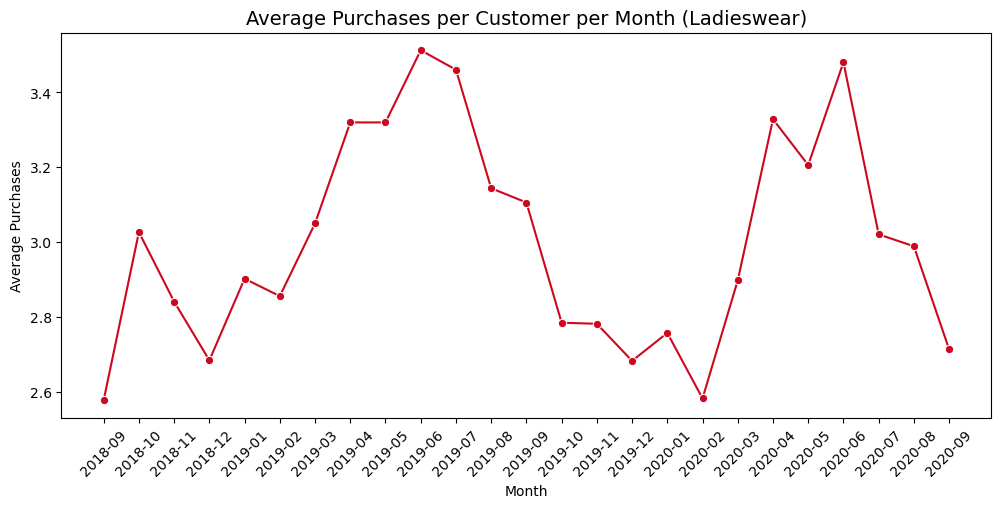

In [55]:



monthly_purchases = (hm_data.groupby(["year_month", "customer_id"]).size().reset_index(name="purchases").groupby("year_month")["purchases"].mean().reset_index())

plt.figure(figsize=(12,5))

sns.lineplot(x="year_month", y="purchases", data=monthly_purchases, marker="o")
plt.title("Average Purchases per Customer per Month (Ladieswear)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Purchases")
plt.xticks(rotation=45)

plt.savefig("Average Purchases per Customer per Month.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()



In [350]:

monthly_purchases = (
    hm_data.groupby(["year_month", "customer_id"])
    .size()
    .reset_index(name="purchases")
    .groupby("year_month")["purchases"]
    .mean()
    .reset_index()
)


top3_months = monthly_purchases.sort_values(by="purchases", ascending=False).head(3)

print("Top 3 Months by Average Purchases per Customer:")
print(top3_months)


Top 3 Months by Average Purchases per Customer:
   year_month  purchases
9     2019-06   3.512719
21    2020-06   3.480683
10    2019-07   3.460652


#### Average purchases per month — Repeat vs New customers

In [57]:


first_purchase = hm_data.groupby("customer_id")["t_dat"].min().reset_index()
first_purchase.columns = ["customer_id", "first_purchase"]

In [59]:
hm_data = hm_data.merge(first_purchase, on="customer_id", how="left")

In [60]:


hm_data["customer_type"] = np.where(
    hm_data["t_dat"] == hm_data["first_purchase"], "New", "Repeat"
)

In [61]:

monthly_purchases_type = (
    hm_data.groupby(["year_month", "customer_id", "customer_type"])
    .size().reset_index(name="purchases")
    .groupby(["year_month", "customer_type"])["purchases"]
    .mean().reset_index()
)


/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/3296500598.py:3: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.lineplot(x="year_month", y="purchases", hue="customer_type",


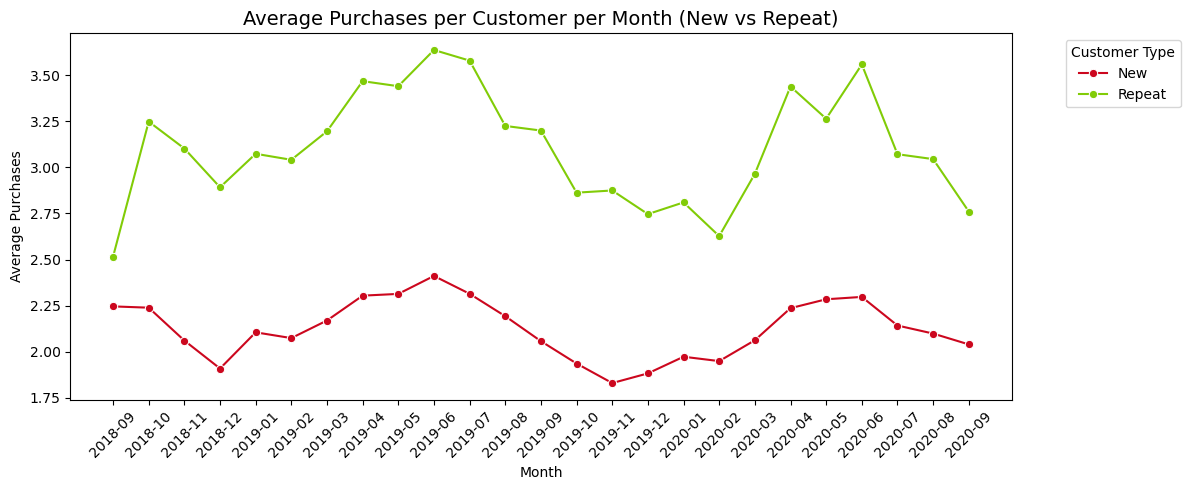

In [62]:
plt.figure(figsize=(12,5))

sns.lineplot(x="year_month", y="purchases", hue="customer_type",
             data=monthly_purchases_type, marker="o", palette=hm_colors)

plt.title("Average Purchases per Customer per Month (New vs Repeat)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Purchases")
plt.xticks(rotation=45)
plt.legend(title="Customer Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("Average Purchases per Customer per Month.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show() 

#### Average purchases per month — Per Age group

In [64]:


monthly_purchases_age = (
    hm_data.groupby(["year_month", "customer_id"]).size().reset_index(name="purchases")
    .merge(hm_data[["customer_id", "age"]].drop_duplicates(), on="customer_id", how="left")
)


In [66]:

age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60+"]
monthly_purchases_age["age_group"] = pd.cut(
    monthly_purchases_age["age"], bins=age_bins, labels=age_labels
)


In [67]:

monthly_age_avg = (
    monthly_purchases_age.groupby(["year_month", "age_group"])["purchases"]
    .mean().reset_index()
)


/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/738489406.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_purchases_age.groupby(["year_month", "age_group"])["purchases"]


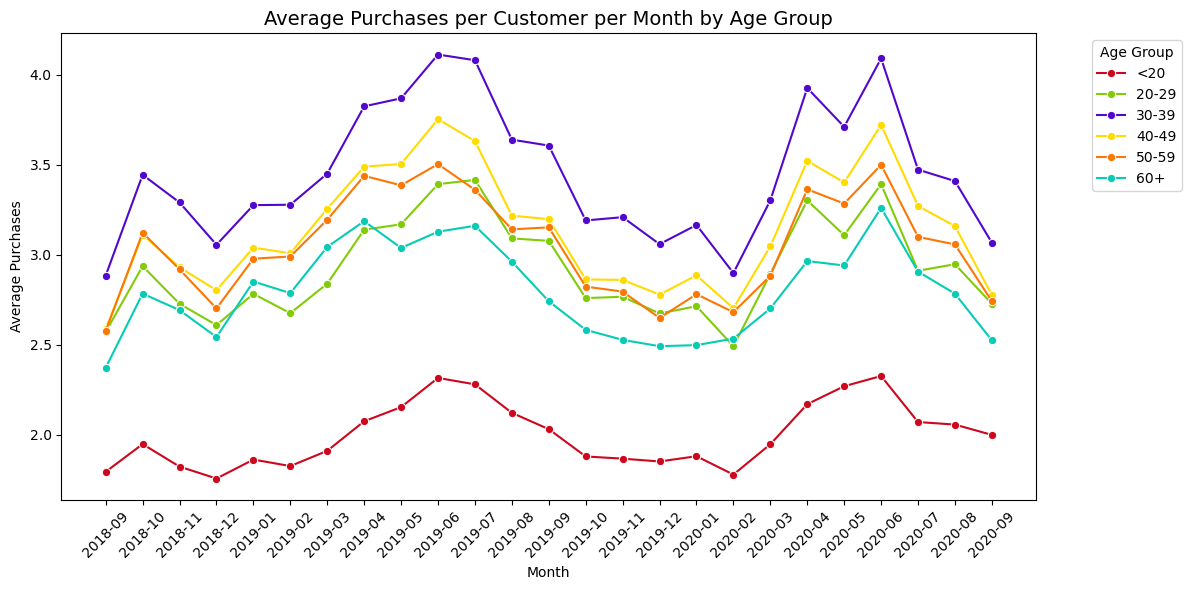

In [68]:

plt.figure(figsize=(12,6))

sns.lineplot(x="year_month", y="purchases", hue="age_group",data=monthly_age_avg, marker="o", palette=hm_colors)

plt.title("Average Purchases per Customer per Month by Age Group", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Average Purchases")
plt.xticks(rotation=45)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.savefig("Average Purchases per Customer per Month by Age Group.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


# Sales Trends

### Best-Selling Product Types

In [70]:


top_products = hm_data["product_type_name"].value_counts().reset_index()
top_products.columns = ["Product Type", "Sales Volume"]


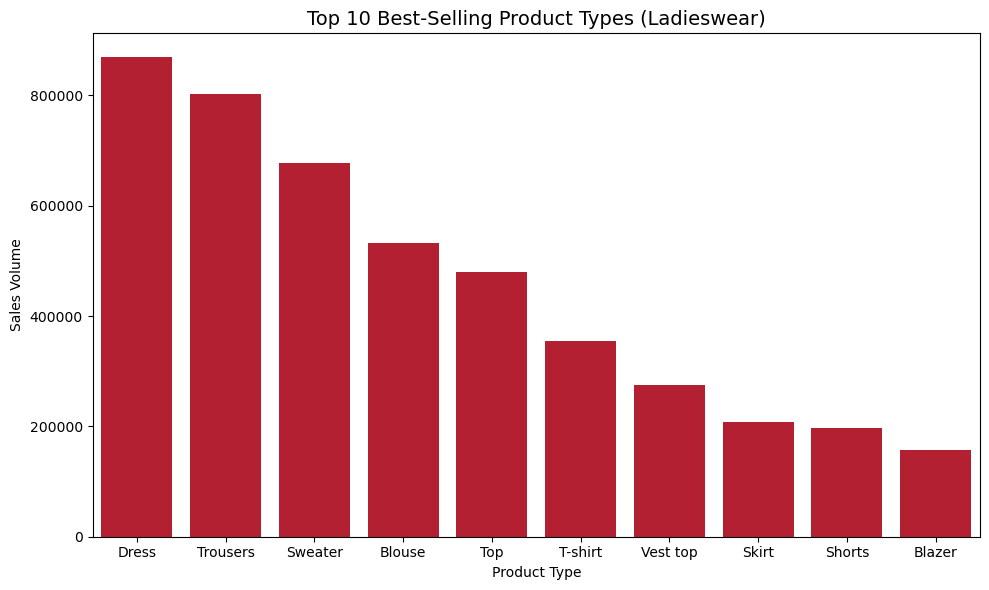

In [72]:
plt.figure(figsize=(10,6))

sns.barplot(x="Product Type" , y="Sales Volume", data=top_products.head(10), color="#CC071E")

plt.title("Top 10 Best-Selling Product Types (Ladieswear)", fontsize=14)
plt.xlabel("Product Type")
plt.ylabel("Sales Volume")
plt.tight_layout()

plt.savefig("Top 10 Best-Selling Product Types.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()

### Seasonal Sales 

##### Analyze monthly sales, then compare spring/summer vs autumn/winter:

In [74]:
hm_data["month_num"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5148197 entries, 0 to 5148196
Series name: month_num
Non-Null Count    Dtype
--------------    -----
5148197 non-null  int32
dtypes: int32(1)
memory usage: 19.6 MB


In [75]:
def season_from_month(m):
    if m in [3, 4, 5, 6, 7, 8]:
        return "Spring/Summer"
    else:
        return "Autumn/Winter"

hm_data["season"] = hm_data["month_num"].apply(season_from_month)


In [77]:
season_sales = hm_data.groupby(["year", "season"]).size().reset_index(name="sales_count")
print(season_sales.head())

   year         season  sales_count
0  2018  Autumn/Winter       681422
1  2019  Autumn/Winter      1188536
2  2019  Spring/Summer      1474428
3  2020  Autumn/Winter       479891
4  2020  Spring/Summer      1323920


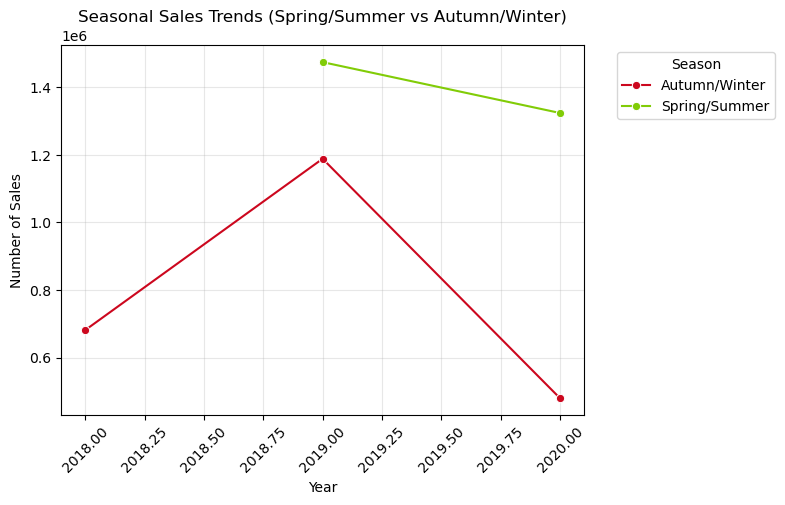

In [78]:

plt.figure(figsize=(8,5))

sns.lineplot(
    data=season_sales,
    x="year",
    y="sales_count",
    hue="season",
    marker="o"
)

plt.title("Seasonal Sales Trends (Spring/Summer vs Autumn/Winter)")
plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.legend(title="Season", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()


plt.show()




In [79]:
def get_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"

hm_data["season"] = hm_data["month_num"].apply(get_season)


In [80]:
hm_data["season"].unique()

array(['Autumn', 'Winter', 'Spring', 'Summer'], dtype=object)

In [81]:
season_sales = (
    hm_data.groupby(["year", "season"])
    .size()
    .reset_index(name="sales_count")
)


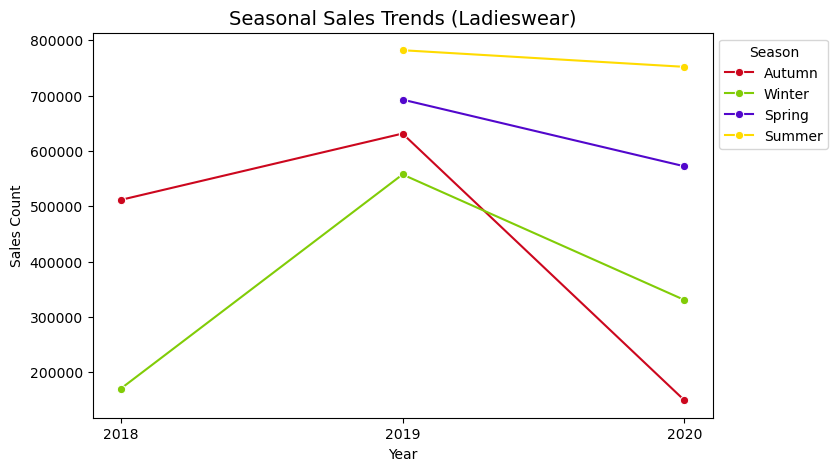

In [84]:
plt.figure(figsize=(8,5))


for season in season_sales["season"].unique():
    subset = season_sales[season_sales["season"] == season]
    sns.lineplot(
        data=subset,
        x="year",
        y="sales_count",
        marker="o",
        label=season
    )

plt.title("Seasonal Sales Trends (Ladieswear)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sales Count")
plt.xticks([2018, 2019, 2020])  # force correct x-axis labels
plt.legend(title="Season", loc="upper left", bbox_to_anchor=(1,1))

plt.savefig("Seasonal Sales Trends (Ladieswear).png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


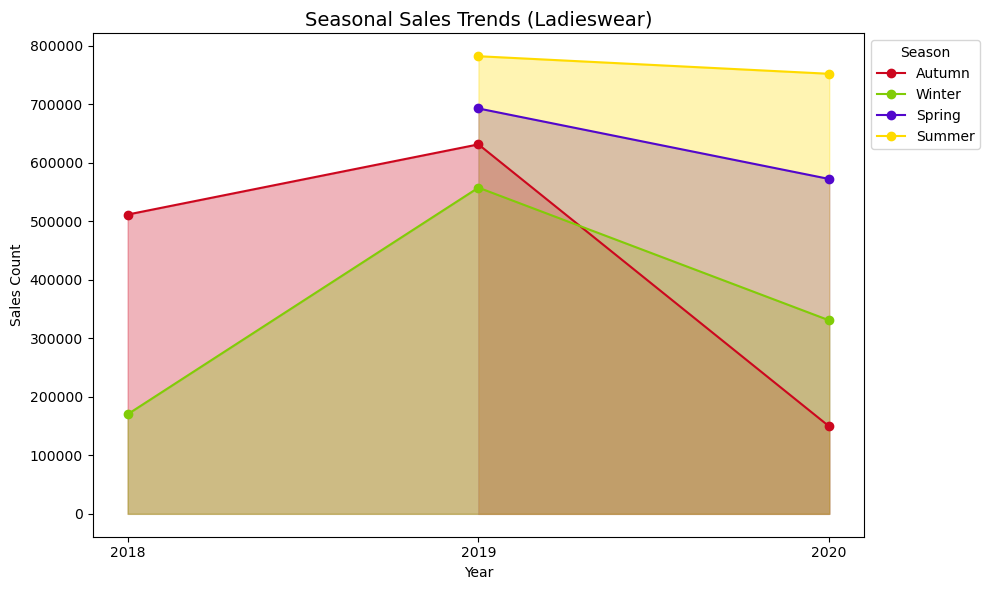

In [247]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Define colors for seasons
season_colors = {
    "Spring": "#5207CC",
    "Summer": "#FFDB00",
    "Autumn": "#CC071E",
    "Winter": "#81CC07"
}

# Plot area for each season
for season in season_sales["season"].unique():
    subset = season_sales[season_sales["season"] == season]
    plt.fill_between(
        subset["year"],
        subset["sales_count"],
        alpha=0.3,
        color=season_colors[season]
    )
    plt.plot(
        subset["year"],
        subset["sales_count"],
        marker="o",
        label=season,
        color=season_colors[season]
    )

plt.title("Seasonal Sales Trends (Ladieswear)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Sales Count")
plt.xticks([2018, 2019, 2020])
plt.legend(title="Season", loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.savefig("Seasonal_Sales_Trends_Ladieswear_Area.png", dpi=300, transparent=True, bbox_inches='tight')

plt.savefig("Seasonal Sales Trends (Ladieswear).png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


In [85]:


def assign_season(month):
    if month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"
    elif month in [12, 1, 2]:
        return "Winter"
    else:
        return "NaN"

hm_data["season_detailed"] = hm_data["month_num"].apply(assign_season)


In [86]:


season_sales_detailed = (
    hm_data.groupby(["year", "season_detailed"])
    .size()
    .reset_index(name="sales_count")
)


In [87]:

season_order = ["Spring", "Summer", "Autumn", "Winter"]

/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/3130108610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/3130108610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/3130108610.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


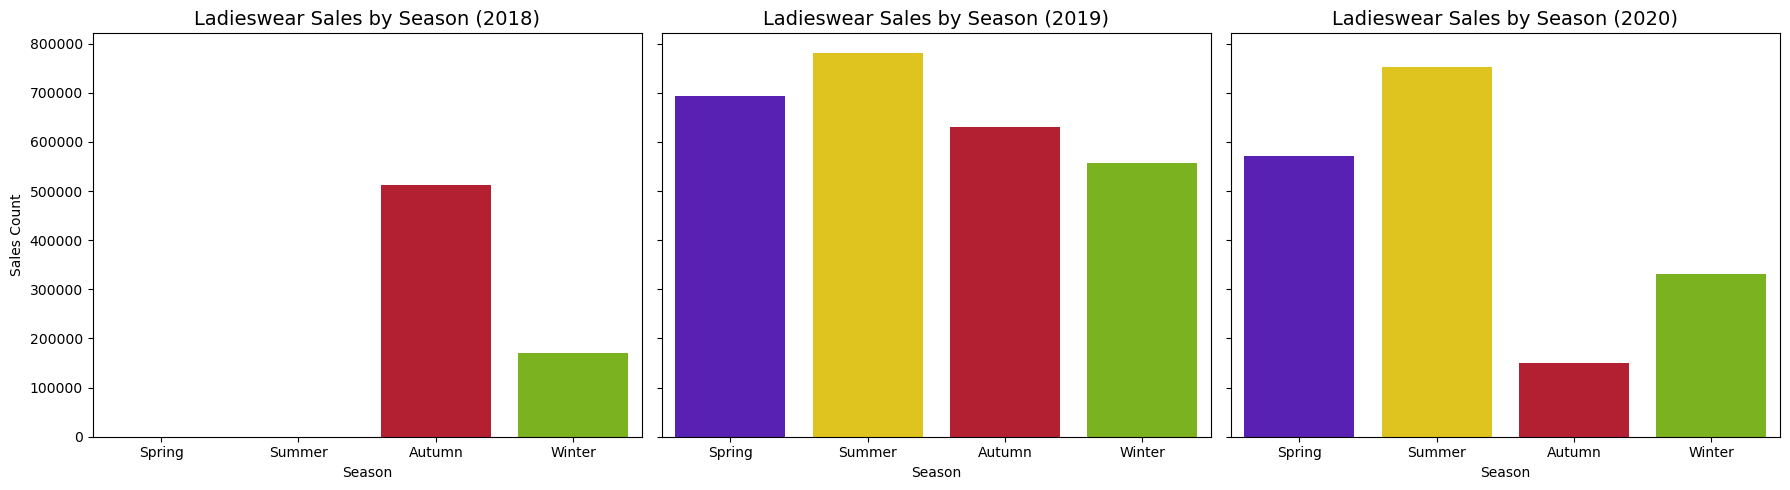

In [88]:


fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

years = sorted(season_sales_detailed["year"].unique())

for i, year in enumerate(years):
    subset = season_sales_detailed[season_sales_detailed["year"] == year]
    sns.barplot(
        data=subset,
        x="season_detailed",
        y="sales_count",
        order=season_order,
        palette=sns.color_palette(["#5207CC", "#FFDB00", "#CC071E", "#81CC07"]),         
        ax=axes[i]
    )
    axes[i].set_title(f"Ladieswear Sales by Season ({year})", fontsize=14)
    axes[i].set_xlabel("Season")
    axes[i].set_ylabel("Sales Count" if i == 0 else "")

plt.tight_layout()

plt.savefig("Ladieswear Sales by Season.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()

In [227]:
!pip install squarify


In [229]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


In [231]:
import squarify


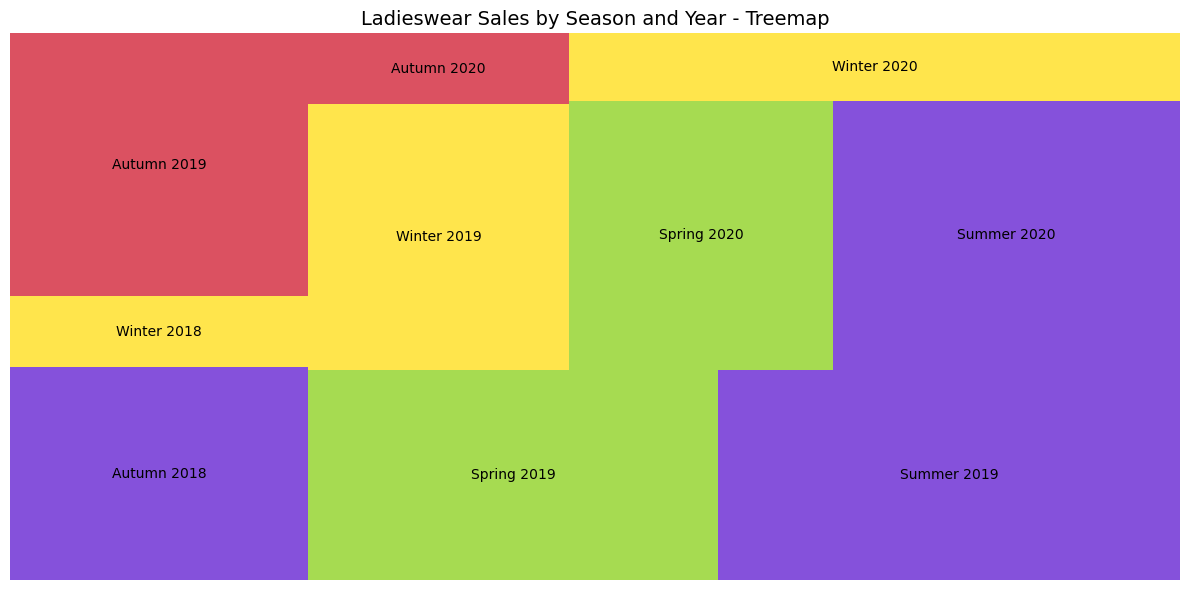

In [249]:



season_sales_detailed["label"] = season_sales_detailed["season_detailed"] + " " + season_sales_detailed["year"].astype(str)


plt.figure(figsize=(12,6))
squarify.plot(
    sizes=season_sales_detailed["sales_count"],
    label=season_sales_detailed["label"],
    color=["#5207CC", "#FFDB00", "#CC071E", "#81CC07"] * len(season_sales_detailed["year"].unique()),
    alpha=0.7
)
plt.axis('off')
plt.title("Ladieswear Sales by Season and Year - Treemap", fontsize=14)
plt.tight_layout()
plt.savefig("Ladieswear_Sales_Treemap.png", dpi=300, transparent=True, bbox_inches='tight')
plt.show()


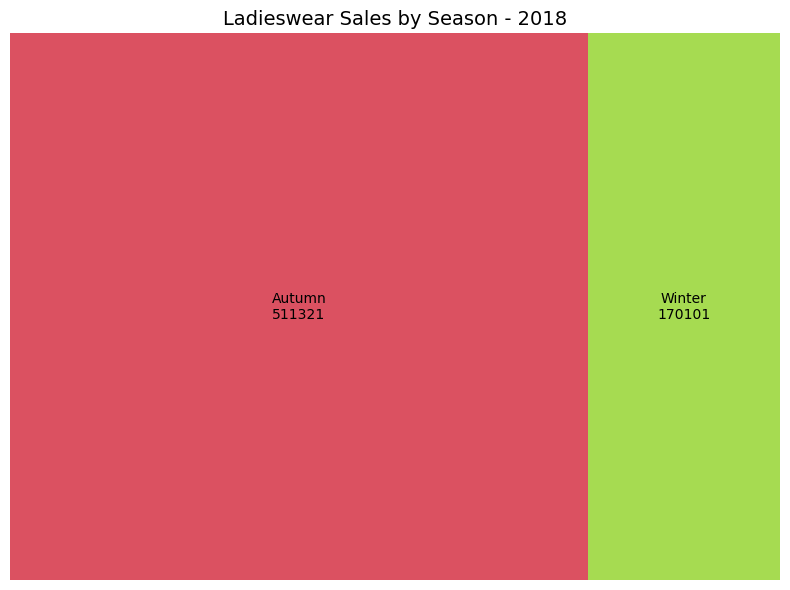

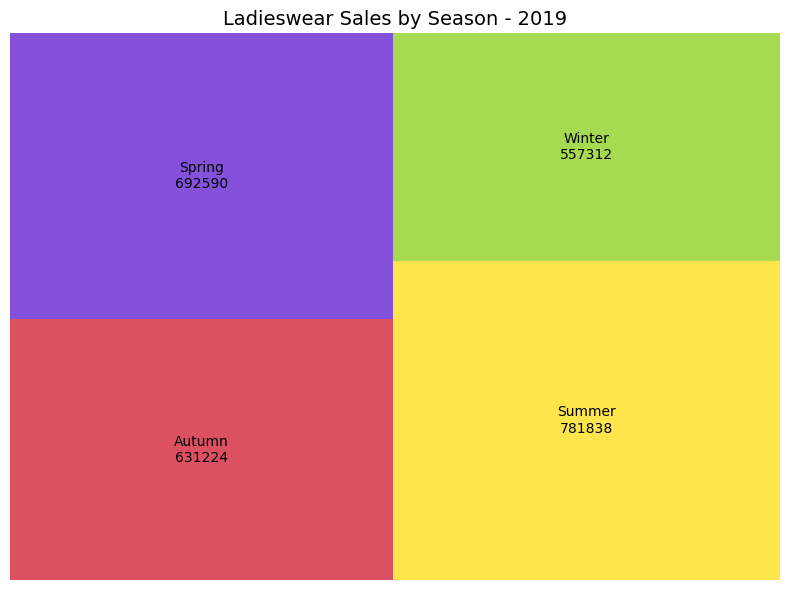

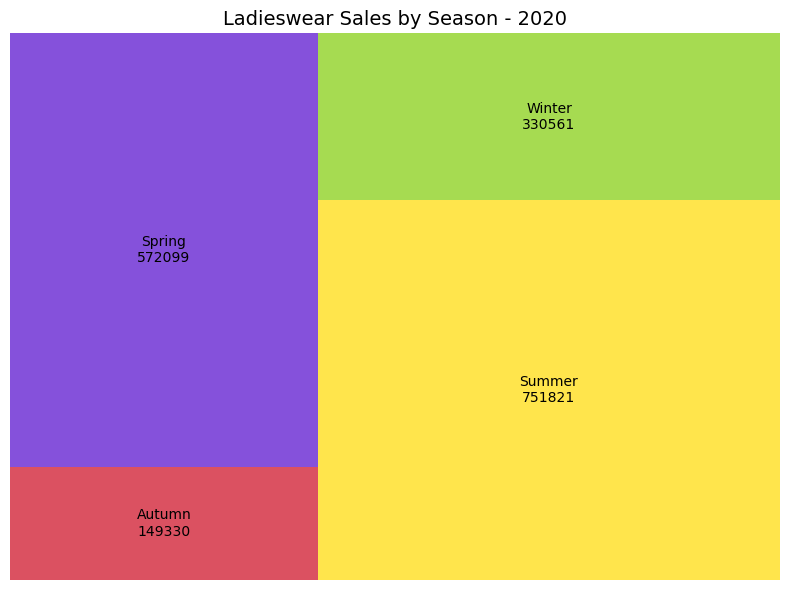

In [235]:
import matplotlib.pyplot as plt
import squarify


season_colors = {
    "Spring": "#5207CC",
    "Summer": "#FFDB00",
    "Autumn": "#CC071E",
    "Winter": "#81CC07"
}


years = sorted(season_sales_detailed["year"].unique())

for year in years:
    subset = season_sales_detailed[season_sales_detailed["year"] == year]
    
    # Labels: Season + Sales Count
    labels = [f"{row['season_detailed']}\n{row['sales_count']}" for idx, row in subset.iterrows()]
    
    # Colors by season
    colors = [season_colors[season] for season in subset["season_detailed"]]
    
    plt.figure(figsize=(8,6))
    squarify.plot(
        sizes=subset["sales_count"],
        label=labels,
        color=colors,
        alpha=0.7
    )
    
    plt.axis('off')
    plt.title(f"Ladieswear Sales by Season - {year}", fontsize=14)
    plt.tight_layout()
    plt.savefig(f"Ladieswear_Sales_Treemap_{year}.png", dpi=300, transparent=True, bbox_inches='tight')
    plt.show()


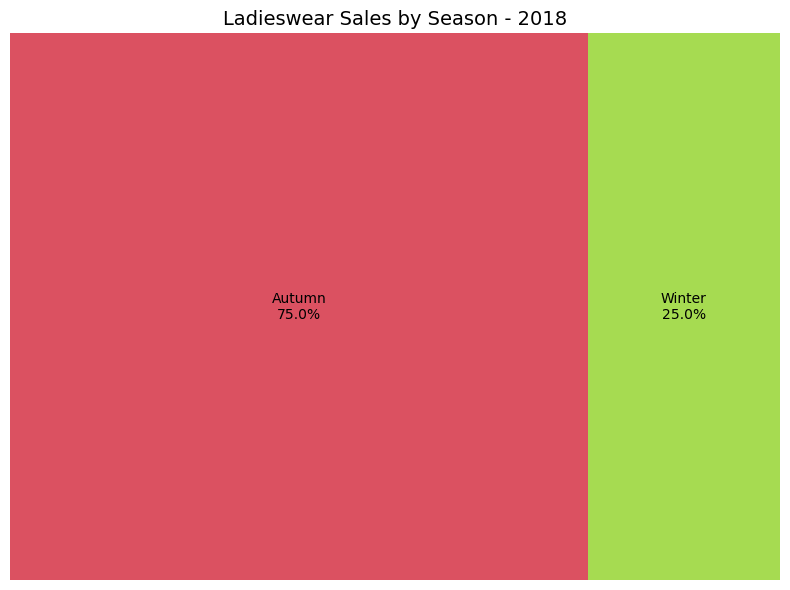

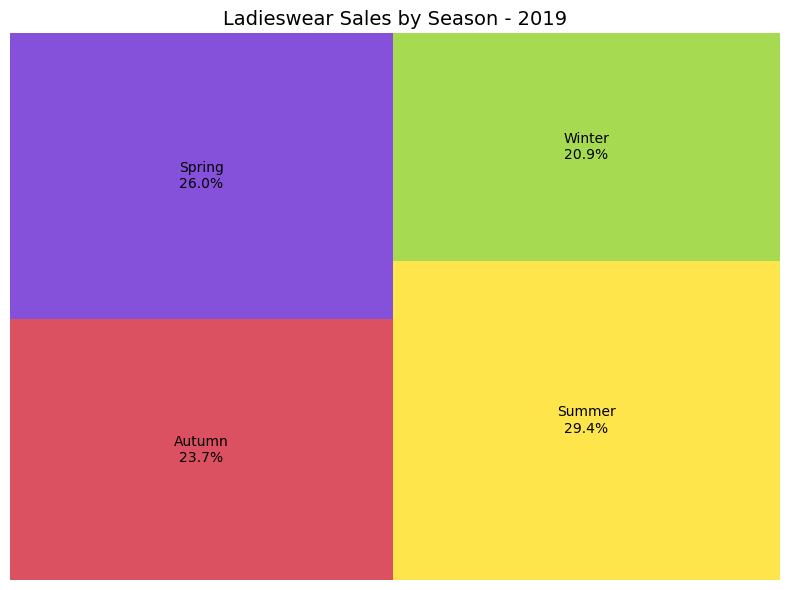

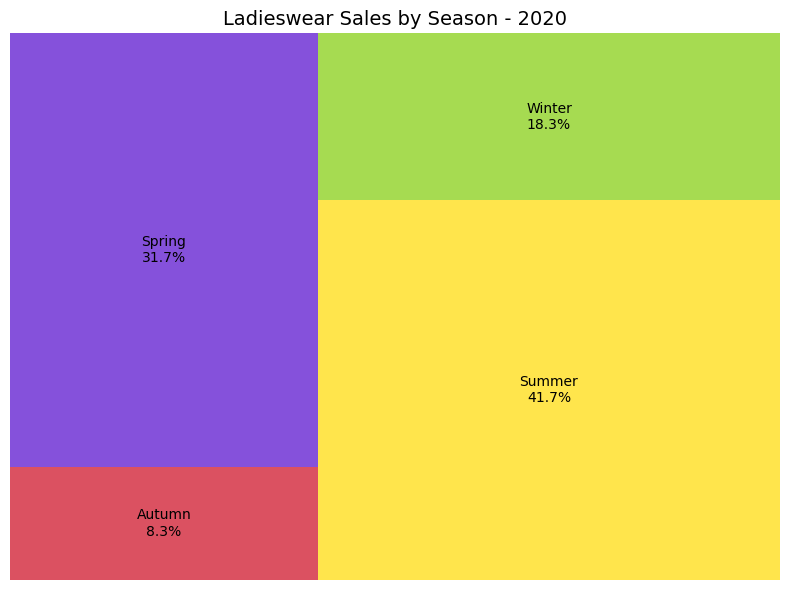

In [251]:

season_colors = {
    "Spring": "#5207CC",
    "Summer": "#FFDB00",
    "Autumn": "#CC071E",
    "Winter": "#81CC07"
}

years = sorted(season_sales_detailed["year"].unique())

for year in years:
    subset = season_sales_detailed[season_sales_detailed["year"] == year].copy()
    
    
    total_sales = subset["sales_count"].sum()
    subset["percent"] = subset["sales_count"] / total_sales * 100
    
 
    labels = [f"{row['season_detailed']}\n{row['percent']:.1f}%" for idx, row in subset.iterrows()]
    
   
    colors = [season_colors[season] for season in subset["season_detailed"]]
    
    plt.figure(figsize=(8,6))
    squarify.plot(
        sizes=subset["sales_count"],  # still use counts for area size
        label=labels,                 # show percentages
        color=colors,
        alpha=0.7
    )
    
    plt.axis('off')
    plt.title(f"Ladieswear Sales by Season - {year}", fontsize=14)
    plt.tight_layout()
    plt.savefig(f"Ladieswear_Sales_Treemap_Percentage_{year}.png", dpi=300, transparent=True, bbox_inches='tight')
    plt.show()


In [354]:

season_sales = hm_data["season_detailed"].value_counts().reset_index()
season_sales.columns = ["Season", "Sales Count"]


total_sales = season_sales["Sales Count"].sum()
season_sales["Percentage"] = season_sales["Sales Count"] / total_sales * 100

print(season_sales)


   Season  Sales Count  Percentage
0  Summer      1533659   29.790216
1  Autumn      1291875   25.093737
2  Spring      1264689   24.565668
3  Winter      1057974   20.550379


#### Popular Color Groups

/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/1784845703.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/1784845703.py:7: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


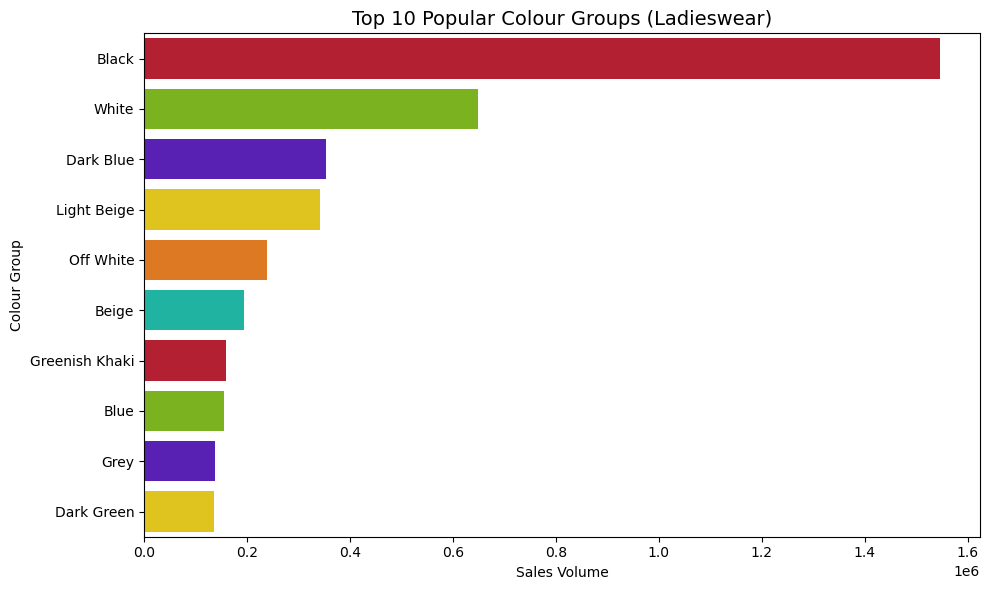

In [90]:


top_colors = hm_data["colour_group_name"].value_counts().reset_index()
top_colors.columns = ["Colour Group", "Sales Volume"]

plt.figure(figsize=(10,6))
sns.barplot(
    x="Sales Volume", y="Colour Group", data=top_colors.head(10), palette=hm_colors
)
plt.title("Top 10 Popular Colour Groups (Ladieswear)", fontsize=14)
plt.xlabel("Sales Volume")
plt.ylabel("Colour Group")
plt.tight_layout()


plt.show()


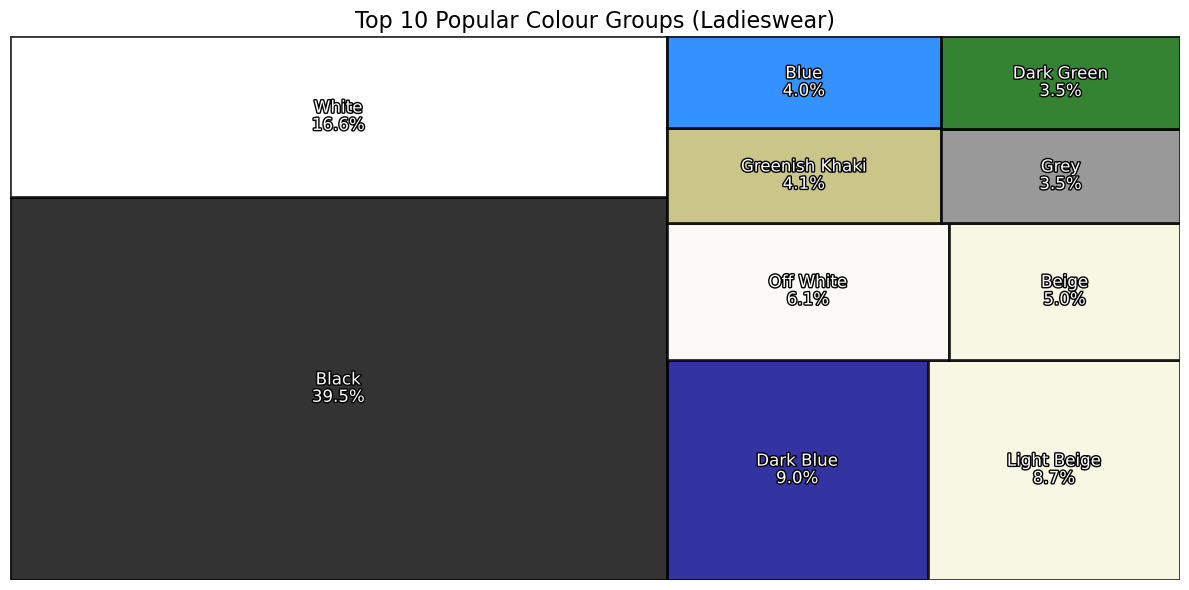

In [352]:
import matplotlib.pyplot as plt
import squarify
import pandas as pd


import matplotlib.patheffects as path_effects

text_kwargs = {
    'color': 'white', 
    'fontsize': 12, 
    'path_effects': [path_effects.withStroke(linewidth=2, foreground="black")]
}



top_colors_10 = {
    "Colour Group": ["Black", "White", "Dark Blue", "Light Beige", "Off White",
                     "Beige", "Greenish Khaki", "Blue", "Grey", "Dark Green"],
    "Sales Volume": [1546078, 649504, 353721, 341592, 238441, 194883, 158852, 155549, 137566, 136216]
}


color_hex = {
    "Black": "#000000",
    "White": "#FFFFFF",
    "Dark Blue": "#00008B",
    "Light Beige": "#F5F5DC",
    "Off White": "#FAF9F6",
    "Beige": "#F5F5DC",
    "Greenish Khaki": "#BDB76B",
    "Blue": "#0077FF",
    "Grey": "#808080",
    "Dark Green": "#006400"
}

df = pd.DataFrame(top_colors_10)


total_sales = df["Sales Volume"].sum()
df["Percent"] = df["Sales Volume"] / total_sales * 100


labels = [f"{row['Colour Group']}\n{row['Percent']:.1f}%" for idx, row in df.iterrows()]


colors = [color_hex[c] for c in df["Colour Group"]]

plt.figure(figsize=(12,6))
squarify.plot(
    sizes=df["Sales Volume"],
    label=labels,
    color=colors,
    alpha=0.8,
    edgecolor="black",
    linewidth=2,
    text_kwargs=text_kwargs
)


plt.axis('off')
plt.title("Top 10 Popular Colour Groups (Ladieswear)", fontsize=16)
plt.tight_layout()

plt.savefig("Top10_ColorGroups_Treemap_Percentage_red.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


#### Popular Garment Groups

/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/252795658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/252795658.py:7: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.barplot(


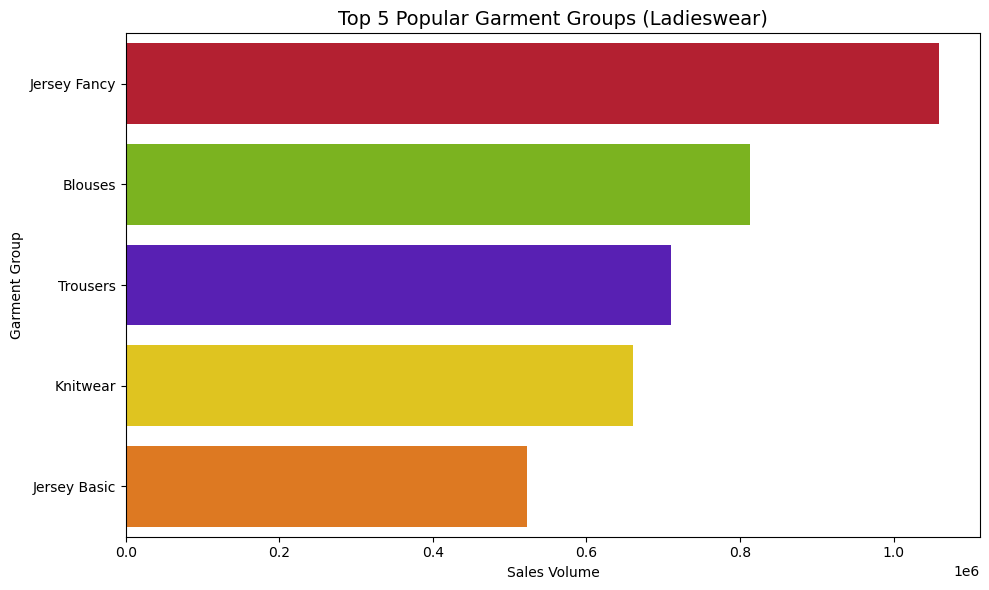

In [288]:


top_garments = hm_data["garment_group_name"].value_counts().reset_index()
top_garments.columns = ["Garment Group", "Sales Volume"]

plt.figure(figsize=(10,6))
sns.barplot(
    x="Sales Volume", y="Garment Group", data=top_garments.head(5), palette=hm_colors
)
plt.title("Top 5 Popular Garment Groups (Ladieswear)", fontsize=14)
plt.xlabel("Sales Volume")
plt.ylabel("Garment Group")
plt.tight_layout()


plt.show()


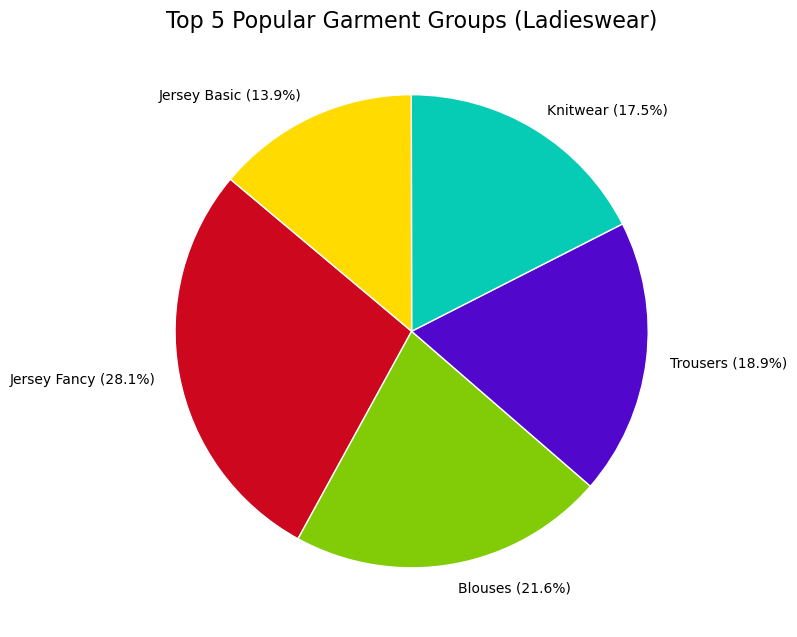

In [310]:
import matplotlib.pyplot as plt


top_garments_5 = top_garments.head(5)
sizes = top_garments_5["Sales Volume"]
total = sizes.sum()


labels = [f"{row['Garment Group']} ({row['Sales Volume']/total*100:.1f}%)" 
          for idx, row in top_garments_5.iterrows()]


plt.figure(figsize=(8,8))
plt.pie(
    sizes,
    labels=labels,
    startangle=140,
    colors=["#CC071E","#81CC07","#5207CC","#07CCB5","#FFDB00"],
    wedgeprops={'edgecolor':'white'}
)

plt.title("Top 5 Popular Garment Groups (Ladieswear)", fontsize=16)
plt.tight_layout()


plt.savefig("Top 5 Popular Garment Groups.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


In [292]:


top_products = (
    hm_data.groupby("prod_name")
    .size()
    .reset_index(name="purchase_count")
    .sort_values(by="purchase_count", ascending=False)
    .head(5)
)

top_products


,prod_name,purchase_count
6775,Luna skinny RW,54180
11479,Tilly (1),37364
2777,Despacito,28200
10718,Skinny Ankle R.W Brooklyn,26195
9282,Pluto RW slacks (1),25236


/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/1822853414.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


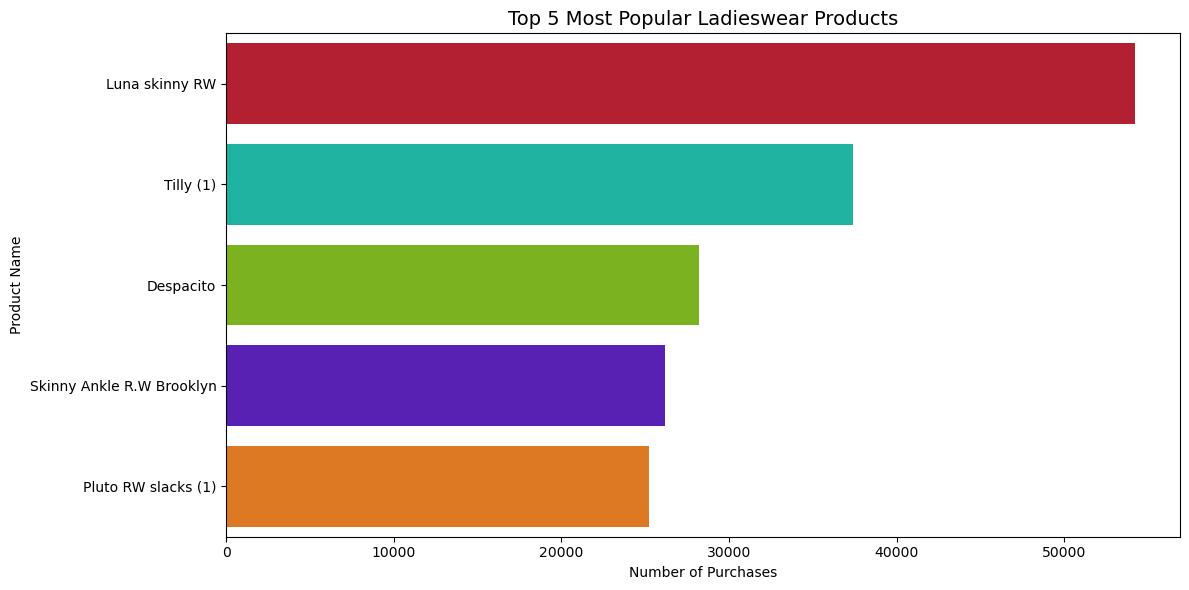

In [296]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_products,
    x="purchase_count",
    y="prod_name",
    palette=sns.color_palette(["#CC071E", "#07CCB5", "#81CC07", "#5207CC", "#FC7703" ][:10])
)

plt.title("Top 5 Most Popular Ladieswear Products", fontsize=14)
plt.xlabel("Number of Purchases")
plt.ylabel("Product Name")
plt.tight_layout()


plt.show()


# Marketing

### Are discounts boosting sales?

   discounted  purchase_count       label  percentage
0       False         2365156  Full Price   45.941443
1        True         2783041  Discounted   54.058557


/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/2593988712.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


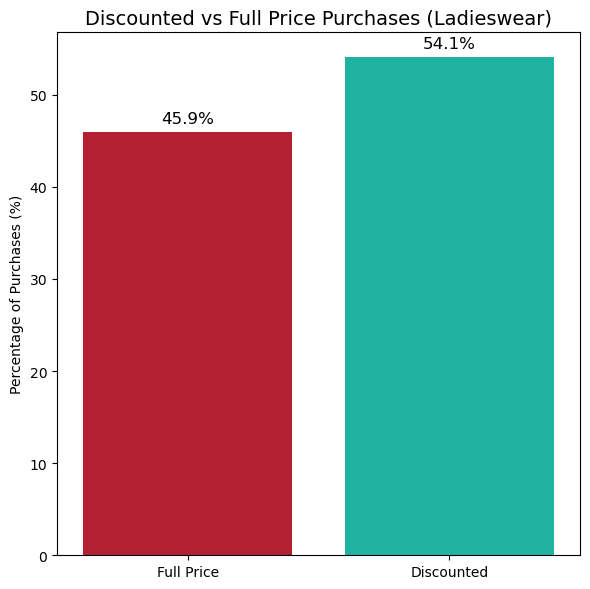

In [338]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


cols_to_drop = [c for c in hm_data.columns if c.startswith("full_price") or c == "discounted"]
hm_data = hm_data.drop(columns=cols_to_drop, errors="ignore")


full_price = (hm_data
              .groupby("article_id", as_index=False)["price"]
              .max()
              .rename(columns={"price": "full_price"}))


hm_data = hm_data.merge(full_price, on="article_id", how="left", validate="m:1")


hm_data = hm_data[hm_data["full_price"].notna()]


hm_data["discounted"] = hm_data["price"] < (hm_data["full_price"] - 1e-9)


discount_sales = (hm_data
                  .groupby("discounted")
                  .size()
                  .reset_index(name="purchase_count"))
discount_sales["label"] = discount_sales["discounted"].map({True: "Discounted", False: "Full Price"})
total = discount_sales["purchase_count"].sum()
discount_sales["percentage"] = discount_sales["purchase_count"] / total * 100

print(discount_sales)


plt.figure(figsize=(6,6))
sns.barplot(
    data=discount_sales,
    x="label",
    y="percentage",
    palette=["#CC071E", "#07CCB5"]
)
plt.title("Discounted vs Full Price Purchases (Ladieswear)", fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage of Purchases (%)")


for i, row in discount_sales.iterrows():
    plt.text(i, row["percentage"] + 1, f"{row['percentage']:.1f}%", ha="center", fontsize=12)

plt.tight_layout()

plt.savefig("Discounted vs Full Price Purchases.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


### Discounted vs full price purchases per season

In [168]:


season_discount = (
    hm_data.groupby(["season_detailed", "discounted"])
    .size()
    .reset_index(name="purchase_count")
)

# Add readable labels

season_discount["price_type"] = season_discount["discounted"].map({True: "Discounted", False: "Full Price"})

print(season_discount)


  season_detailed  discounted  purchase_count  price_type
0          Autumn       False          565094  Full Price
1          Autumn        True          726781  Discounted
2          Spring       False          578915  Full Price
3          Spring        True          685774  Discounted
4          Summer       False          539398  Full Price
5          Summer        True          994261  Discounted
6          Winter       False          361850  Full Price
7          Winter        True          696124  Discounted


In [1]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=season_discount,
    x="season_detailed",
    y="purchase_count",
    hue="price_type",
    palette=["#CC071E", "#07CCB5"]  # red = discounted, teal = full price
)

plt.title("Discounted vs Full Price Purchases per Season (Ladieswear)", fontsize=14)
plt.xlabel("Season")
plt.ylabel("Number of Purchases")
plt.legend(title="Price Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

### Discounted vs full price purchases per season

In [173]:


monthly_discount = (
    hm_data.groupby(["year_month", "discounted"])
    .size()
    .reset_index(name="purchase_count")
)



monthly_discount["price_type"] = monthly_discount["discounted"].map({True: "Discounted", False: "Full Price"})
print(monthly_discount.head())


  year_month  discounted  purchase_count  price_type
0    2018-09       False           44772  Full Price
1    2018-09        True           47372  Discounted
2    2018-10       False           88869  Full Price
3    2018-10        True          129271  Discounted
4    2018-11       False           73477  Full Price


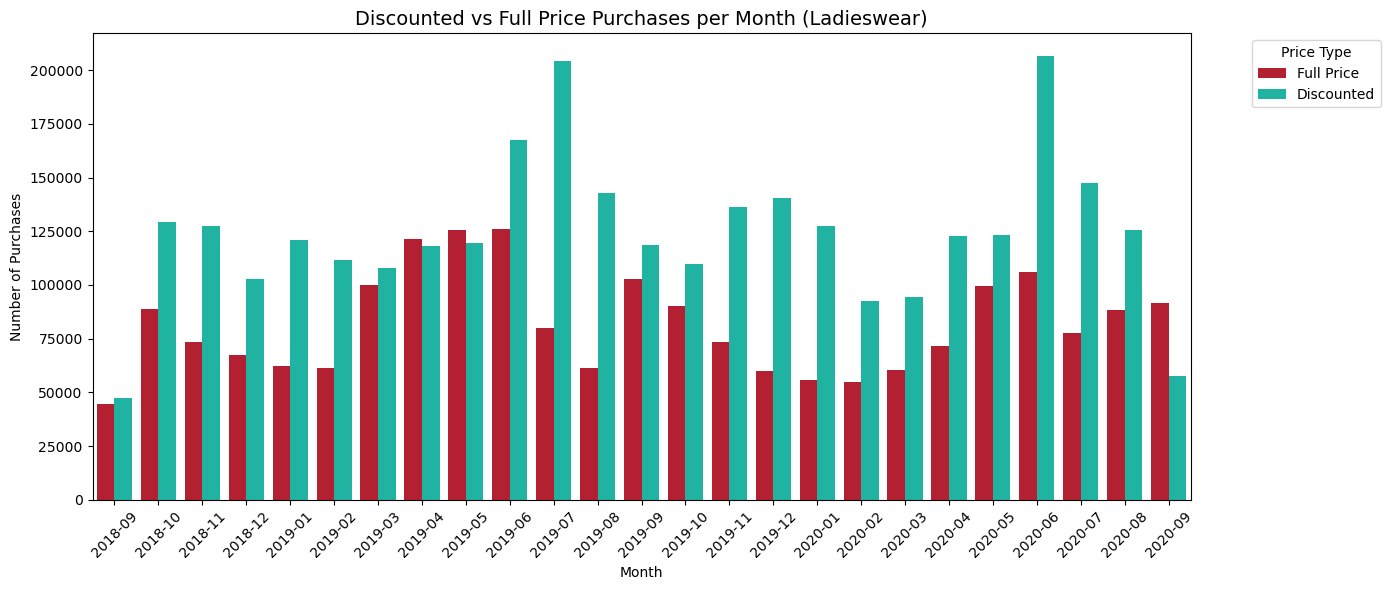

In [340]:
plt.figure(figsize=(14,6))
sns.barplot(
    data=monthly_discount,
    x="year_month",
    y="purchase_count",
    hue="price_type",
    palette=["#CC071E", "#07CCB5"]
)

plt.title("Discounted vs Full Price Purchases per Month (Ladieswear)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Number of Purchases")
plt.xticks(rotation=45)
plt.legend(title="Price Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.savefig("Discounted vs Full Price Purchases per Month.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/3566444738.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(monthly_purchases["year_month"], rotation=45)


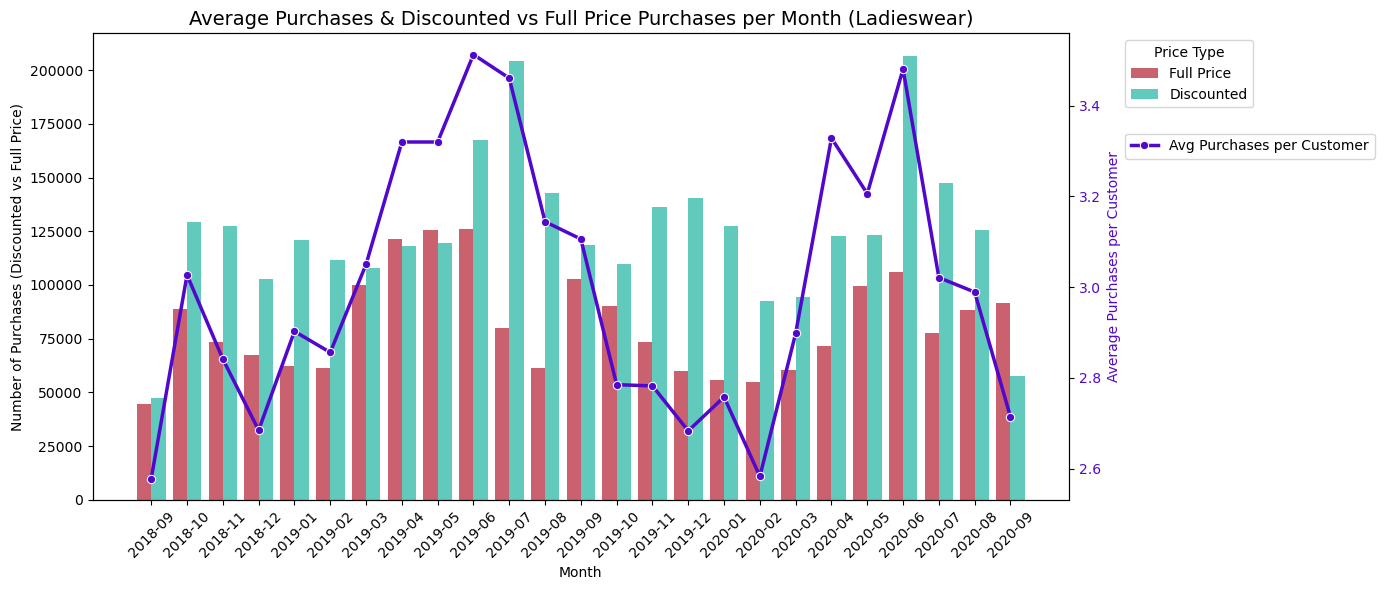

In [342]:
fig, ax1 = plt.subplots(figsize=(14,6))


sns.barplot(
    data=monthly_discount,
    x="year_month",
    y="purchase_count",
    hue="price_type",
    palette=["#CC071E", "#07CCB5"],
    ax=ax1,
    alpha=0.7
)

ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Purchases (Discounted vs Full Price)")
ax1.tick_params(axis='y')

# Move bar legend outside
ax1.legend(title="Price Type", bbox_to_anchor=(1.05, 1), loc="upper left")


ax2 = ax1.twinx()  

line = sns.lineplot(
    x="year_month",
    y="purchases",
    data=monthly_purchases,
    marker="o",
    ax=ax2,
    color="#5207CC",
    label="Avg Purchases per Customer",
    linewidth=2.5,
    zorder=10  # bring line to the front
)

ax2.set_ylabel("Average Purchases per Customer", color="#5207CC")
ax2.tick_params(axis='y', labelcolor="#5207CC")


ax2.legend(title="", bbox_to_anchor=(1.05, 0.8), loc="upper left")


ax1.set_xticklabels(monthly_purchases["year_month"], rotation=45)
plt.title("Average Purchases & Discounted vs Full Price Purchases per Month (Ladieswear)", fontsize=14)

plt.tight_layout()

plt.savefig("Monthly_Purchases_and_Discounts.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()


In [191]:
import pandas as pd



age_bins = [0, 20, 30, 40, 50, 60, 100]
age_labels = ["<20", "20-29", "30-39", "40-49", "50-59", "60+"]



hm_data["age_group"] = pd.cut(hm_data["age"], bins=age_bins, labels=age_labels)


In [195]:


age_discount = (
    hm_data.groupby(["age_group", "discounted"]).size()
    .reset_index(name="purchase_count")
)




age_discount["price_type"] = age_discount["discounted"].map({True: "Discounted", False: "Full Price"})
print(age_discount)


/var/folders/m8/qxsmsb313bl5l70mghsn7q680000gn/T/ipykernel_2643/2217077820.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hm_data.groupby(["age_group", "discounted"])


   age_group  discounted  purchase_count  price_type
0        <20       False           74941  Full Price
1        <20        True          112306  Discounted
2      20-29       False          720076  Full Price
3      20-29        True         1168630  Discounted
4      30-39       False          324546  Full Price
5      30-39        True          539697  Discounted
6      40-49       False          348732  Full Price
7      40-49        True          525957  Discounted
8      50-59       False          417379  Full Price
9      50-59        True          558090  Discounted
10       60+       False          156010  Full Price
11       60+        True          193485  Discounted


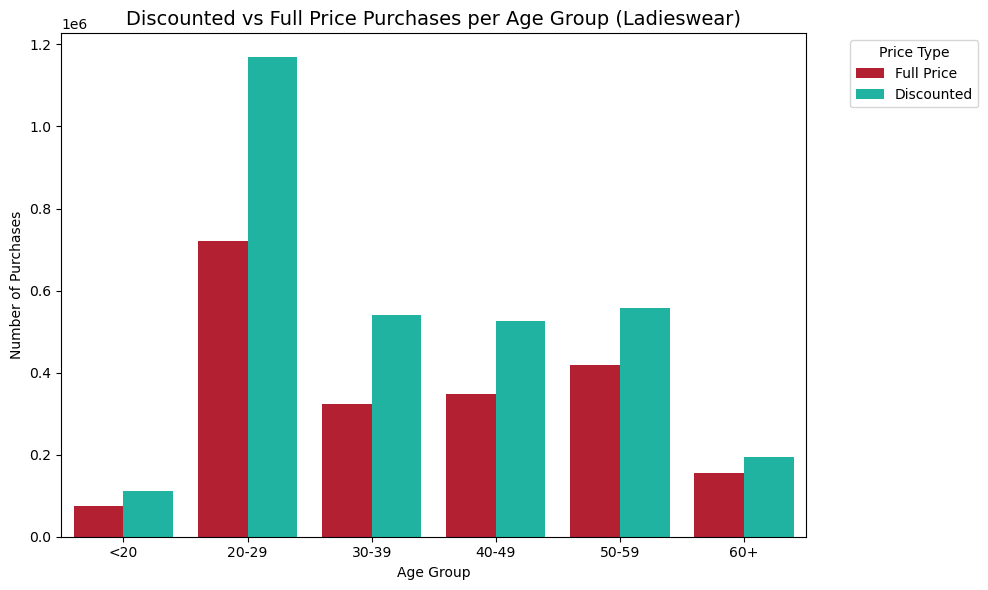

In [344]:


plt.figure(figsize=(10,6))

sns.barplot(
    data=age_discount,
    x="age_group",
    y="purchase_count",
    hue="price_type",
    palette=["#CC071E", "#07CCB5"]  # red = discounted, teal = full price
)

plt.title("Discounted vs Full Price Purchases per Age Group (Ladieswear)", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of Purchases")
plt.legend(title="Price Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.savefig("Monthly_Purchases_and_Discounts_per Age Group.png", dpi=300, transparent=True, bbox_inches='tight')

plt.show()
